In [97]:
from google.colab import files

In [98]:
from google.colab import drive

In [99]:
import pandas as pd
import numpy as np

In [100]:
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Ahora puedes ejecutar tu código sin que aparezcan mensajes de advertencia

warnings.filterwarnings('ignore', category=UserWarning)

In [101]:
warnings.filterwarnings('ignore', category=UserWarning)

In [102]:
# Configura pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [103]:
def analizar_dataframe(df):
    # Calcula la cantidad de nulos por columna
    nulos_por_columna = df.isnull().sum()

    # Calcula la cantidad de datos duplicados
    duplicados = df.duplicated().sum()

    # Calcula la cantidad de filas con algún outlier
    # Para este caso, vamos a considerar un valor como outlier si está fuera del rango de 1.5 veces el rango intercuartil (IQR)
    # Solo consideramos las columnas numéricas para calcular los cuantiles
    columnas_numericas = df.select_dtypes(include=[np.number]).columns
    Q1 = df[columnas_numericas].quantile(0.25)
    Q3 = df[columnas_numericas].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df[columnas_numericas] > (Q3 + 1.5 * IQR))).sum()

    return nulos_por_columna, duplicados, outliers

In [104]:
ruta = '/content/drive/MyDrive/Datasets/'

alt_fuel_ruta = ruta + 'Alternative Fuel Vehicles US.csv'
alt_fuel = pd.read_csv(alt_fuel_ruta)

elec_alt_fuel_ruta = ruta + 'Electric and Alternative Fuel Charging Stations.csv'
elec_alt_fuel = pd.read_csv(elec_alt_fuel_ruta)

elec_car_ruta = ruta + 'ElectricCarData_Clean.csv'
elec_car_clean = pd.read_csv(elec_car_ruta)

elec_car_ruta_norm = ruta + 'ElectricCarData_Norm.csv'
elec_car_norm = pd.read_csv(elec_car_ruta_norm)

light_duty_ruta = ruta + 'Light Duty Vehicles.csv'
light_duty = pd.read_csv(light_duty_ruta)

vihicle_fuel_ruta = ruta + 'Light Duty Vehicles.csv'
vihicle_fuel = pd.read_csv(vihicle_fuel_ruta)

taxi_zones_ruta = ruta + 'taxi+_zone_lookup.csv'
taxi_zones_lookup = pd.read_csv(taxi_zones_ruta)


In [105]:
# Aplica la función a cada uno de los nuevos dataframes

nulos_elec_alt_fuel, duplicados_elec_alt_fuel, outliers_elec_alt_fuel = analizar_dataframe(elec_alt_fuel)
nulos_elec_car_clean, duplicados_elec_car_clean, outliers_elec_car_clean = analizar_dataframe(elec_car_clean)
nulos_elec_car_norm, duplicados_elec_car_norm, outliers_elec_car_norm = analizar_dataframe(elec_car_norm)
nulos_light_duty, duplicados_light_duty, outliers_light_duty = analizar_dataframe(light_duty)
nulos_vihicle_fuel, duplicados_vihicle_fuel, outliers_vihicle_fuel = analizar_dataframe(vihicle_fuel)
nulos_taxi_zones_lookup, duplicados_taxi_zones_lookup, outliers_taxi_zones_lookup = analizar_dataframe(taxi_zones_lookup)

In [106]:
# Imprime los resultados
print("Alternative Fuel Vehicles US:")
print()
print("Nulos por columna:", nulos_alt_fuel)
print()
print("Duplicados:", duplicados_alt_fuel)
print()
print("Outliers:", outliers_alt_fuel)
print()

Alternative Fuel Vehicles US:

Nulos por columna: Category                                0
Model                                   0
Model Year                            288
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy City         713
Alternative Fuel Economy Highway      713
Alternative Fuel Economy Combined     620
Conventional Fuel Economy City        438
Conventional Fuel Economy Highway     438
Conventional Fuel Economy Combined    438
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                 433
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

Duplicados: 

In [107]:
alt_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [155]:
alt_fuel.head(5)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [156]:
alt_fuel.tail()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
877,Street Sweeper,HSP,NaN,TYMCO,CNG - Compressed Natural Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cummins Westport L9N 8.9L Near Zero,NaN,NaN
878,Step Van,(various models),NaN,Utilimaster,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,According to manufacturer: Various platforms a...,NaN
879,Transit Bus,CX45E,NaN,Van Hool,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 56,Siemens ELFA2 Electric Drive System 360kW,According to manufacturer: 676 kWh battery sto...,NaN
880,Tractor,VNR Electric - Class 8,NaN,Volvo,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"According to manufacturer: 340kW; 455hp; 4,051...",NaN
881,Step Van,C-Series,NaN,Workhorse,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,Workhorse Dual Axial Flux Interior Permanent M...,According to manufacturer: Up to 105 kWh batte...,NaN


In [154]:
alt_fuel['Model Year'].unique()

array([2022., 2021.,   nan])

Nulos por columna: Se observa que hay varios valores nulos en diversas columnas. Por ejemplo, "Model Year" tiene 288 valores nulos, "All-Electric Range" tiene 660, "PHEV Total Range" tiene 839, y así sucesivamente.

Duplicados: Se encontró 1 duplicado en el dataset.

Outliers: Se identificaron outliers en varias columnas, como "Alternative Fuel Economy Highway" (16 outliers), "Conventional Fuel Economy City" (60 outliers), "Conventional Fuel Economy Highway" (35 outliers), y otras.

Información del DataFrame:

El dataframe tiene 882 filas y 22 columnas.
Las columnas contienen tanto datos numéricos como de tipo objeto (categóricos o de texto).
Algunas columnas tienen una cantidad significativa de valores nulos, como "Number of Passengers", "Notes", y "Drivetrain".
La columna "Model Year" está representada como float64, podrías considerar cambiarla a tipo int64 si solo contiene años.

## Que representan las columnas ?


Claro, a continuación, te proporcionaré una breve descripción de cada columna en el dataset "Alternative Fuel Vehicles US":

Category: Categoría del vehículo, como "Sedan/Wagon", que describe la clase del vehículo.

Model: Modelo del vehículo.

Model Year: Año del modelo del vehículo.

Manufacturer: Fabricante del vehículo.

Fuel: Tipo de combustible del vehículo, como "Hybrid Electric".

All-Electric Range: Rango total en millas que puede recorrer el vehículo con energía eléctrica solamente.

PHEV Total Range: Rango total en millas para vehículos híbridos enchufables (PHEV).

Alternative Fuel Economy City: Rendimiento en millas por galón (MPG) para ciudad utilizando combustibles alternativos.

Alternative Fuel Economy Highway: Rendimiento en MPG para carretera utilizando combustibles alternativos.

Alternative Fuel Economy Combined: Rendimiento en MPG combinado utilizando combustibles alternativos.

Conventional Fuel Economy City: Rendimiento en MPG para ciudad utilizando combustibles convencionales.

Conventional Fuel Economy Highway: Rendimiento en MPG para carretera utilizando combustibles convencionales.

Conventional Fuel Economy Combined: Rendimiento en MPG combinado utilizando combustibles convencionales.

Transmission Type: Tipo de transmisión del vehículo, como "Auto" (automática).

Transmission Make: Fabricante de la transmisión.

Engine Type: Tipo de motor del vehículo.

Engine Size: Tamaño del motor del vehículo.

Engine Cylinder Count: Número de cilindros en el motor.

Number of Passengers: Número de pasajeros que puede transportar el vehículo.

Heavy-Duty Power System: Sistema de energía pesada para vehículos pesados.

Notes: Notas adicionales sobre el vehículo.

Drivetrain: Tipo de tren de potencia del vehículo, como "AWD" (tracción en todas las ruedas).

Estas descripciones te darán una idea general de la información almacenada en cada columna. Si hay alguna columna específica sobre la que te gustaría obtener más detalles o si tienes alguna pregunta específica, estaré encantado de ayudarte

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

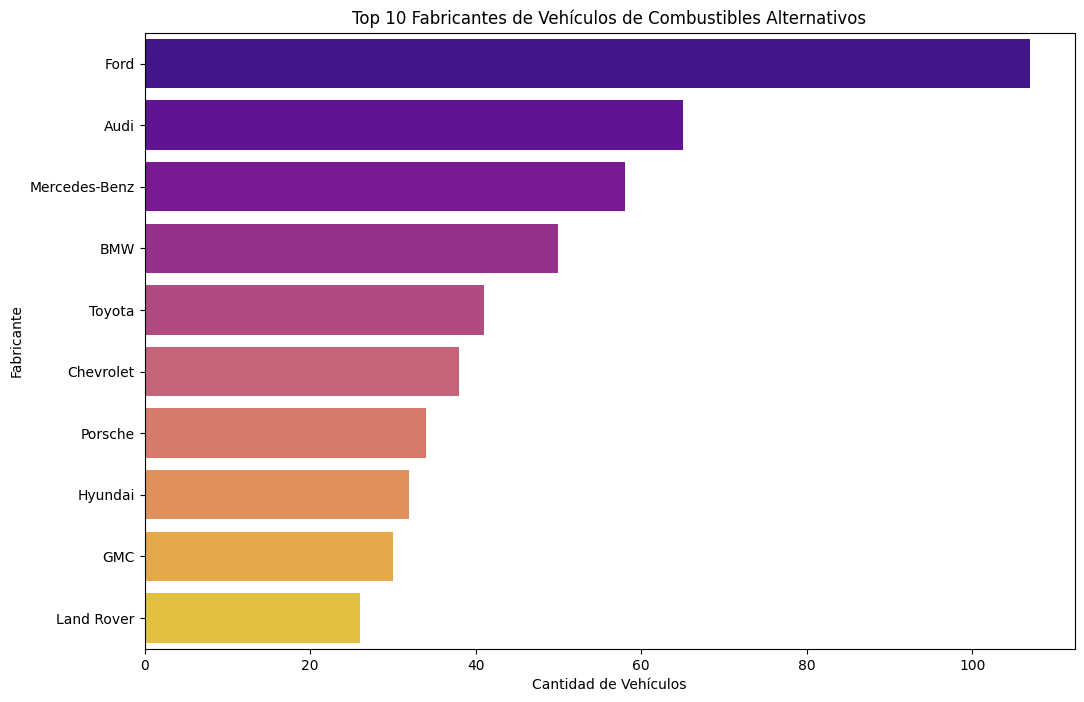

In [110]:
plt.figure(figsize=(12, 8))

top_manufacturers = alt_fuel['Manufacturer'].value_counts().nlargest(10)
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='plasma')
plt.title('Top 10 Fabricantes de Vehículos de Combustibles Alternativos')
plt.xlabel('Cantidad de Vehículos')
plt.ylabel('Fabricante')

plt.show()


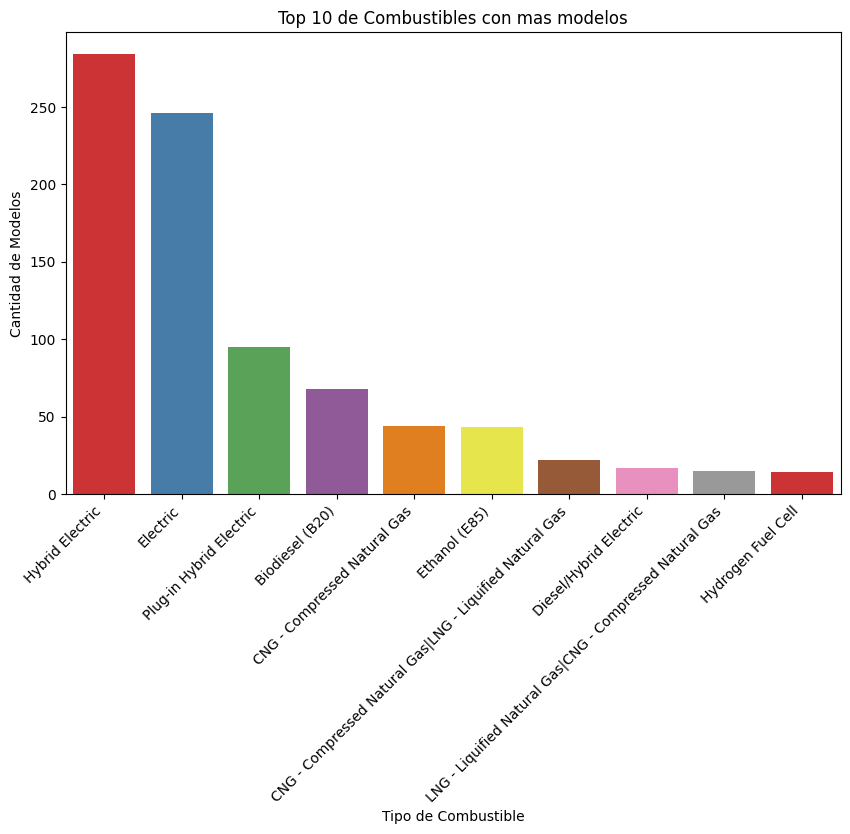

In [111]:
plt.figure(figsize=(10, 6))

top_fuels = alt_fuel['Fuel'].value_counts().nlargest(10)
sns.barplot(x=top_fuels.index, y=top_fuels.values, palette='Set1')
plt.title('Top 10 de Combustibles con mas modelos')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad de Modelos')

plt.xticks(rotation=45, ha='right')  # Para rotar las etiquetas del eje x para mayor legibilidad
plt.show()



In [112]:
print("Electric and Alternative Fuel Charging Stations:")
print()
print("Nulos por columna:", nulos_elec_alt_fuel)
print()
print("Duplicados:", duplicados_elec_alt_fuel)
print()
print("Outliers:", outliers_elec_alt_fuel)
print()


Electric and Alternative Fuel Charging Stations:

Nulos por columna: Fuel Type Code                          0
Station Name                            0
Street Address                          1
Intersection Directions             65913
City                                    0
State                                   0
ZIP                                     1
Plus4                               70406
Station Phone                        5202
Status Code                             0
Expected Date                       69188
Groups With Access Code                 0
Access Days Time                     3778
Cards Accepted                      59117
BD Blends                           69189
NG Fill Type Code                   68803
NG PSI                              68809
EV Level1 EVSE Num                  70120
EV Level2 EVSE Num                  16262
EV DC Fast Count                    62099
EV Other Info                       70357
EV Network                           9499
EV Netw

In [113]:
elec_alt_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   Intersection Directions           4493 non-null   object 
 4   City                              70406 non-null  object 
 5   State                             70406 non-null  object 
 6   ZIP                               70405 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     65204 non-null  object 
 9   Status Code                       70406 non-null  object 
 10  Expected Date                     1218 non-null   object 
 11  Groups With Access Code           70406 non-null  object 
 12  Acce

In [114]:
elec_alt_fuel[elec_alt_fuel['City'] == 'New York'].head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
9,CNG,Con Edison - W 29th St Service Center,281 11th Ave,"In Manhattan, W 29th Street and 12th Avenue.",New York,NY,10001,NaN,212-643-3054,E,NaN,Public - Card key at all times,24 hours daily; call 718-204-4100 to arrange f...,NaN,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,40.752903,-74.005831,2022-06-14,124,2022-06-14 16:22:47 UTC,T,NaN,NaN,2014-05-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,UTILITY,1.0,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
10,CNG,Con Edison - E 16th St Service Center,700 E 16th St,"In Manhattan, at Avenue C and E 16th. Broadway...",New York,NY,10009,NaN,212-460-6708,E,NaN,Public - Card key at all times,24 hours daily; call 718-204-4048 to arrange f...,NaN,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,40.729175,-73.973310,2022-06-14,125,2022-06-14 16:22:47 UTC,T,NaN,NaN,1998-01-15,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,UTILITY,1.0,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
7777,ELEC,Port Authority Bus Terminal,625 8th Ave,NaN,New York,NY,10018,NaN,866-816-7584,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,EV Connect,http://evconnect.com/,200-8,40.756177,-73.990558,2020-04-08,65287,2021-03-11 23:22:17 UTC,J,NaN,NaN,2018-04-01,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,PARKING_GARAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9645,ELEC,United Parcel Service,643 W 43rd St,NaN,New York,NY,10036,NaN,NaN,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,200-8,40.762442,-74.000055,2022-06-14,74648,2022-06-14 16:24:51 UTC,P,NaN,NaN,2016-03-01,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,FLEET_GARAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14384,ELEC,Spectrum,401 W 219th St,NaN,New York,NY,10034,NaN,866-816-7584,E,NaN,Public,Office business hours; for employee and guest ...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,EV Connect,http://evconnect.com/,200-8,40.871210,-73.911616,2020-04-08,94854,2022-04-28 20:01:31 UTC,P,NaN,NaN,2016-06-27,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,OFFICE_BLDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [115]:
elec_alt_fuel.head(10)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,NaN,Private,NaN,NaN,NaN,B,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,32.367916,-86.267021,2022-06-14,17,2022-06-14 16:22:47 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,STANDALONE_STATION,NaN,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,NaN,Public - Card key at all times,24 hours daily,Comdata FleetOne FuelMan Voyager Wright_Exp,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.745843,-84.398837,2021-08-04,42,2022-02-10 19:42:29 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,STANDALONE_STATION,1.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,NaN,Private - Government only,NaN,NaN,NaN,Q,3000,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.821911,-84.367461,2021-08-04,45,2022-02-10 19:42:29 UTC,LG,NaN,NaN,1996-12-15,NaN,LD,NaN,NaN,NaN,US,NaN,NaN,NaN,Privé - Réservé au gouvernement,NaN,private,GOVERNMENT,NaN,FLEET_GARAGE,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,NaN,Private,NaN,NaN,NaN,B,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,33.760256,-84.543822,2022-06-14,64,2022-06-14 16:22:47 UTC,P,NaN,NaN,1997-01-01,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,STANDALONE_STATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,NaN,Public - Credit card at all times,24 hours daily,FuelMan M V Wright_Exp,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,35.362213,-94.375338,2022-06-14,73,2022-06-14 16:22:47 UTC,T,NaN,NaN,1997-01-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,UTILITY,1.0,NONE,250.0,57855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
5,CNG,Clean Energy - Logan International Airport,1000 Cottage St Ext,"From Route 1, take the first exit after Callah...",East Boston,MA,2128,NaN,866-809-4869,E,NaN,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean En...,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,NaN,Q,3000 3600,NaN,NaN,NaN,NaN,NaN,NaN,GPS,42.374706,-71.026549,2021-08-04,81,2022-02-10 19:42:29 UTC,SG,NaN,NaN,1996-11-15,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,AIRPORT,4.0,NONE,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,False
6,CNG,Clean Energy - Everett - National Grid,16 Rover St,"Rt 16, exit to Rt 99, to Dexter St to Rover. O...",Eve

Electric and Alternative Fuel Charging Stations:

Nulos por columna: Hay varias columnas con valores nulos. Por ejemplo, "Intersection Directions" tiene 65,913 valores nulos, "EV Level1 EVSE Num" tiene 70,120 nulos, y así sucesivamente.

Duplicados: No se encontraron duplicados en el dataset.

Outliers: Se identificaron outliers en varias columnas, como "EV Level1 EVSE Num" (58 outliers), "EV Level2 EVSE Num" (20,834 outliers), "EV DC Fast Count" (667 outliers), y otras.

Información del DataFrame:

El dataframe tiene 70,406 filas y 65 columnas.
Las columnas contienen tanto datos numéricos como de tipo objeto (categóricos o de texto).
Algunas columnas tienen una cantidad significativa de valores nulos, como "EV Other Info", "Hydrogen Status Link", y "CNG Dispenser Num".
La columna "Plus4" no tiene valores válidos (todos los valores son NaN) y puede eliminarse.
Algunas columnas contienen información geoespacial, como "Latitude" y "Longitude".
Hay columnas que contienen información sobre el tipo de combustible, número de estaciones de carga eléctrica, etc.
Primeras 5 filas del DataFrame: Se presentan las primeras 5 filas del dataframe para darte una vista previa de los datos.

## Que describen las columnas?

Fuel Type Code: Código que describe el tipo de combustible asociado a la estación de carga.

Station Name: Nombre de la estación de carga.

Street Address: Dirección de la estación de carga.

Intersection Directions: Direcciones o indicaciones de la intersección cercana a la estación.

City: Ciudad donde se encuentra la estación de carga.

State: Estado donde se encuentra la estación de carga.

ZIP: Código postal de la ubicación de la estación de carga.

Plus4: Variable sin valores válidos, posiblemente se pueda descartar.

Station Phone: Número de teléfono de la estación de carga.

Status Code: Código que indica el estado de la estación de carga.

Expected Date: Fecha esperada de algún evento relacionado con la estación (puede ser la fecha de instalación, apertura, etc.).

Groups With Access Code: Grupos que tienen acceso a la estación de carga mediante algún código.

Access Days Time: Días y horas de acceso a la estación de carga.

Cards Accepted: Tipos de tarjetas de pago aceptadas en la estación de carga.

BD Blends: Mezclas de biodiesel disponibles en la estación.

NG Fill Type Code: Código que describe el tipo de gas natural disponible.

NG PSI: Presión del gas natural en la estación.

EV Level1 EVSE Num: Número de enchufes de carga de nivel 1 para vehículos eléctricos.

EV Level2 EVSE Num: Número de enchufes de carga de nivel 2 para vehículos eléctricos.

EV DC Fast Count: Cantidad de cargadores rápidos de corriente continua para vehículos eléctricos.

EV Other Info: Otra información relacionada con vehículos eléctricos.

EV Network: Red de carga para vehículos eléctricos asociada a la estación.

EV Network Web: Sitio web de la red de carga para vehículos eléctricos.

Geocode Status: Estado de la geocodificación de la dirección de la estación.

Latitude: Coordenada de latitud de la estación de carga.

Longitude: Coordenada de longitud de la estación de carga.

Date Last Confirmed: Fecha de la última confirmación de datos.

ID: Identificador único de la estación de carga.

Updated At: Fecha y hora de la última actualización.

Owner Type Code: Código que describe el tipo de propietario de la estación.

Federal Agency ID: Identificador de la agencia federal asociada.

Federal Agency Name: Nombre de la agencia federal asociada.

Open Date: Fecha de apertura de la estación.

Hydrogen Status Link: Enlace de estado del hidrógeno.

NG Vehicle Class: Clase de vehículo de gas natural.

LPG Primary: Tipo principal de gas licuado de petróleo.

E85 Blender Pump: Estación con bomba mezcladora de E85.

EV Connector Types: Tipos de conectores de carga para vehículos eléctricos.

Country: País donde se encuentra la estación de carga.

Intersection Directions (French): Direcciones de intersección en francés.

Access Days Time (French): Días y horas de acceso en francés.

BD Blends (French): Mezclas de biodiesel en francés.

Groups With Access Code (French): Grupos con código de acceso en francés.

Hydrogen Is Retail: Indica si el hidrógeno está disponible para la venta al público.

Access Code: Código de acceso a la estación de carga.

Access Detail Code: Detalles del código de acceso.

Federal Agency Code: Código de la agencia federal asociada.

Facility Type: Tipo de instalación de carga.

CNG Dispenser Num: Número de dispensadores de gas natural comprimido.

CNG On-Site Renewable Source: Fuente renovable de gas natural comprimido en el lugar.

CNG Total Compression Capacity: Capacidad total de compresión de gas natural comprimido.

CNG Storage Capacity: Capacidad de almacenamiento de gas natural comprimido.

LNG On-Site Renewable Source: Fuente renovable de gas natural licuado en el lugar.

E85 Other Ethanol Blends: Mezclas de etanol E85 y otras.

EV Pricing: Información sobre precios de carga para vehículos eléctricos.

EV Pricing (French): Información sobre precios de carga en francés.

LPG Nozzle Types: Tipos de boquillas para gas licuado de petróleo.

Hydrogen Pressures: Presiones de hidrógeno.

Hydrogen Standards: Estándares de hidrógeno.

CNG Fill Type Code: Código que describe el tipo de llenado de gas natural comprimido.

CNG PSI: Presión de gas natural comprimido.

CNG Vehicle Class: Clase de vehículo de gas natural comprimido.

LNG Vehicle Class: Clase de vehículo de gas natural licuado.

EV On-Site Renewable Source: Fuente renovable para carga de vehículos eléctricos en el lugar.

Restricted Access: Acceso restringido a la estación de carga.

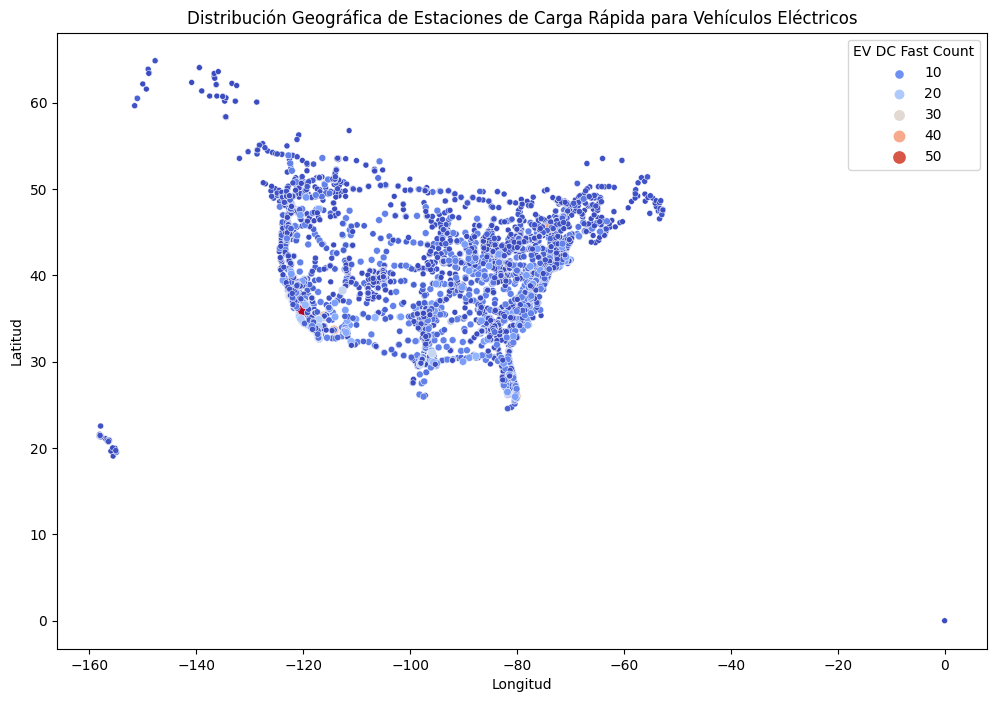

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=elec_alt_fuel, palette='coolwarm', hue='EV DC Fast Count', size='EV DC Fast Count')
plt.title('Distribución Geográfica de Estaciones de Carga Rápida para Vehículos Eléctricos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


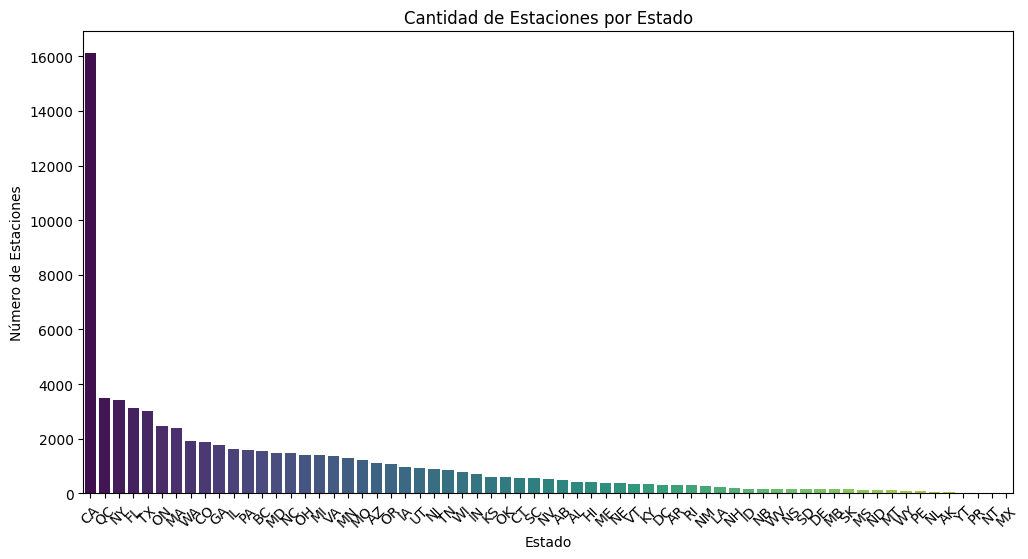

In [117]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=elec_alt_fuel, palette='viridis', order=elec_alt_fuel['State'].value_counts().index)
plt.title('Cantidad de Estaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=45)
plt.show()


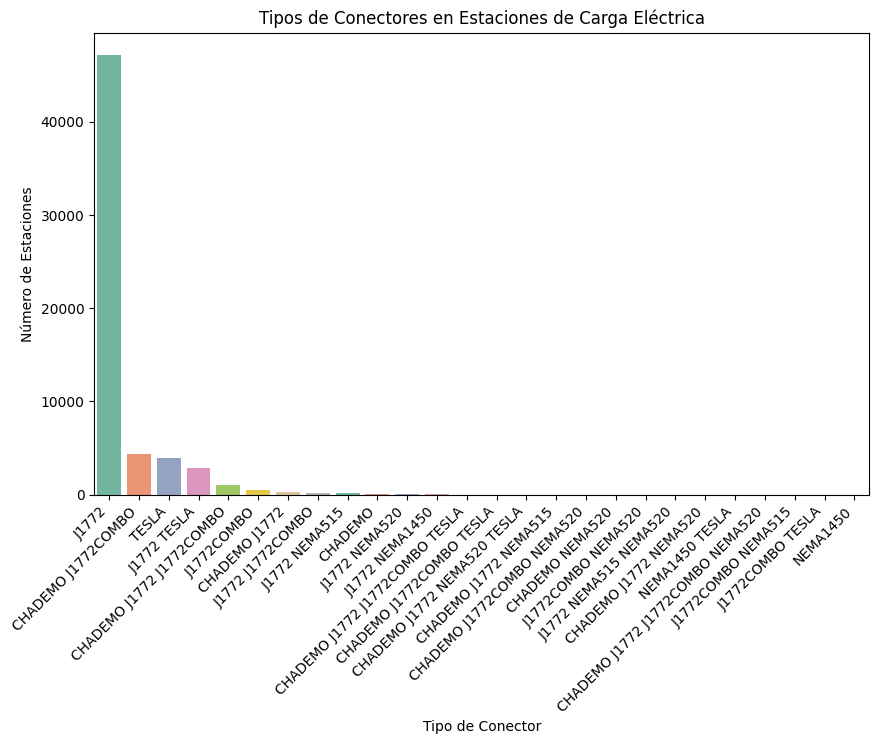

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EV Connector Types', data=elec_alt_fuel, palette='Set2', order=elec_alt_fuel['EV Connector Types'].value_counts().index)
plt.title('Tipos de Conectores en Estaciones de Carga Eléctrica')
plt.xlabel('Tipo de Conector')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=45, ha='right')
plt.show()


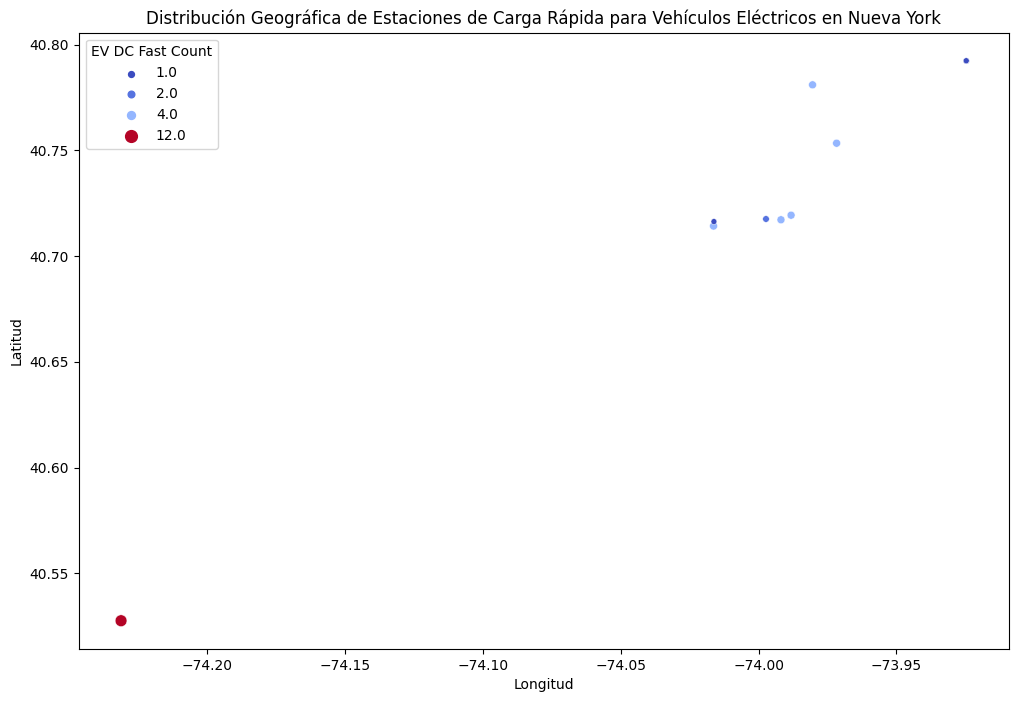

In [119]:
# Filtrar datos para incluir solo estaciones en la ciudad de Nueva York
nyc_stations = elec_alt_fuel[elec_alt_fuel['City'].str.contains('New York', case=False, na=False)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=nyc_stations, palette='coolwarm', hue='EV DC Fast Count', size='EV DC Fast Count')
plt.title('Distribución Geográfica de Estaciones de Carga Rápida para Vehículos Eléctricos en Nueva York')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()



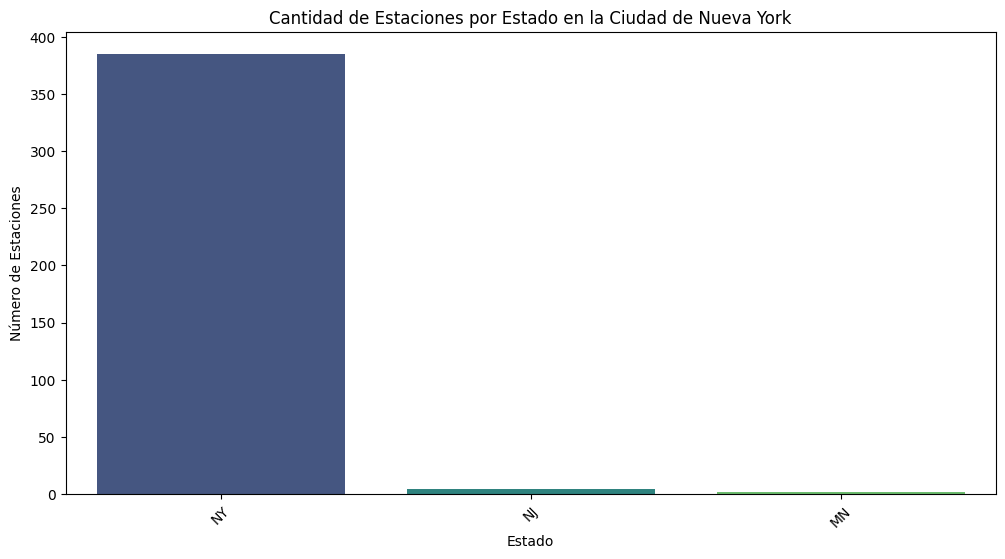

In [120]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=nyc_stations, palette='viridis', order=nyc_stations['State'].value_counts().index)
plt.title('Cantidad de Estaciones por Estado en la Ciudad de Nueva York')
plt.xlabel('Estado')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=45)
plt.show()



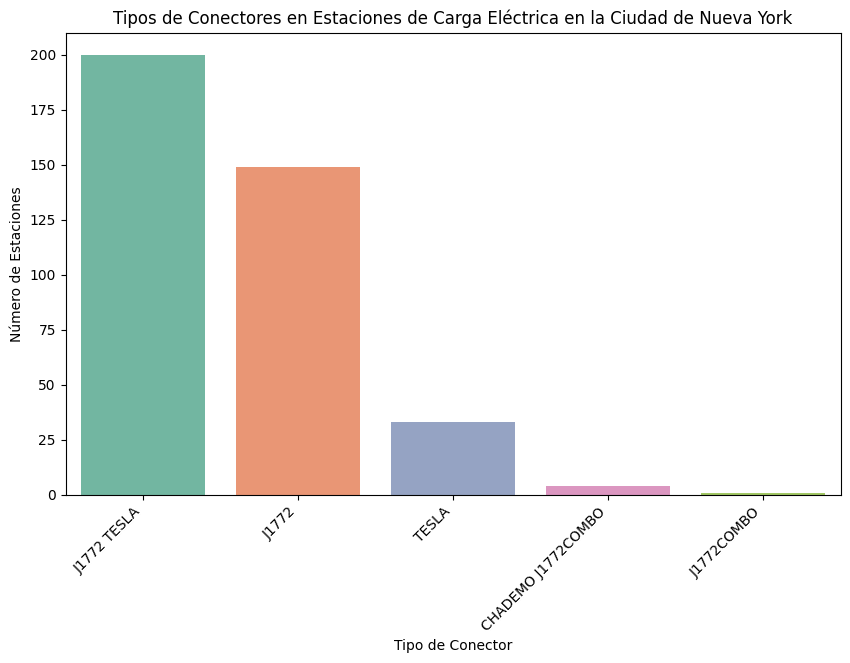

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EV Connector Types', data=nyc_stations, palette='Set2', order=nyc_stations['EV Connector Types'].value_counts().index)
plt.title('Tipos de Conectores en Estaciones de Carga Eléctrica en la Ciudad de Nueva York')
plt.xlabel('Tipo de Conector')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=45, ha='right')
plt.show()


# Imprime los resultados
print("Alternative Fuel Vehicles US:")
print("Nulos por columna:", nulos_alt_fuel)
print("Duplicados:", duplicados_alt_fuel)
print("Outliers:", outliers_alt_fuel)
print()

print("Electric and Alternative Fuel Charging Stations:")
print("Nulos por columna:", nulos_elec_alt_fuel)
print("Duplicados:", duplicados_elec_alt_fuel)
print("Outliers:", outliers_elec_alt_fuel)
print()

print("ElectricCarData Clean:")
print("Nulos por columna:", nulos_elec_car_clean)
print("Duplicados:", duplicados_elec_car_clean)
print("Outliers:", outliers_elec_car_clean)
print()

print("ElectricCarData Normalized:")
print("Nulos por columna:", nulos_elec_car_norm)
print("Duplicados:", duplicados_elec_car_norm)
print("Outliers:", outliers_elec_car_norm)
print()

print("Light Duty Vehicles:")
print("Nulos por columna:", nulos_light_duty)
print("Duplicados:", duplicados_light_duty)
print("Outliers:", outliers_light_duty)
print()

print("Vehicle Fuel Types:")
print("Nulos por columna:", nulos_vihicle_fuel)
print("Duplicados:", duplicados_vihicle_fuel)
print("Outliers:", outliers_vihicle_fuel)
print()

print("Taxi Zone Lookup:")
print("Nulos por columna:", nulos_taxi_zones_lookup)
print("Duplicados:", duplicados_taxi_zones_lookup)
print("Outliers:", outliers_taxi_zones_lookup)
print()

In [122]:
print("ElectricCarData Clean:")
print()
print("Nulos por columna:", nulos_elec_car_clean)
print()
print("Duplicados:", duplicados_elec_car_clean)
print()
print("Outliers:", outliers_elec_car_clean)
print()

ElectricCarData Clean:

Nulos por columna: Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

Duplicados: 0

Outliers: AccelSec            1
TopSpeed_KmH        1
Range_Km            2
Efficiency_WhKm     7
Seats              32
PriceEuro           6
dtype: int64



In [123]:
elec_car_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [124]:
elec_car_clean.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000



ElectricCarData Clean:

Brand: Marca del automóvil eléctrico.

Model: Modelo del automóvil eléctrico.

AccelSec: Aceleración de 0 a 100 km/h en segundos.

TopSpeed_KmH: Velocidad máxima en kilómetros por hora.

Range_Km: Autonomía del vehículo en kilómetros con una carga completa.

Efficiency_WhKm: Eficiencia energética en vatios-hora por kilómetro.

FastCharge_KmH: Velocidad de carga rápida en kilómetros por hora.

RapidCharge: Indicador de si el vehículo admite carga rápida.

PowerTrain: Tipo de tren motriz (transmisión del vehículo).

PlugType: Tipo de conector de carga.

BodyStyle: Estilo de carrocería del vehículo.

Segment: Segmento al que pertenece el vehículo.

Seats: Número de asientos en el vehículo.

PriceEuro: Precio del vehículo en euros.

Este conjunto de datos parece contener información sobre diversos modelos de automóviles eléctricos, incluyendo detalles sobre su rendimiento, características técnicas y precios.

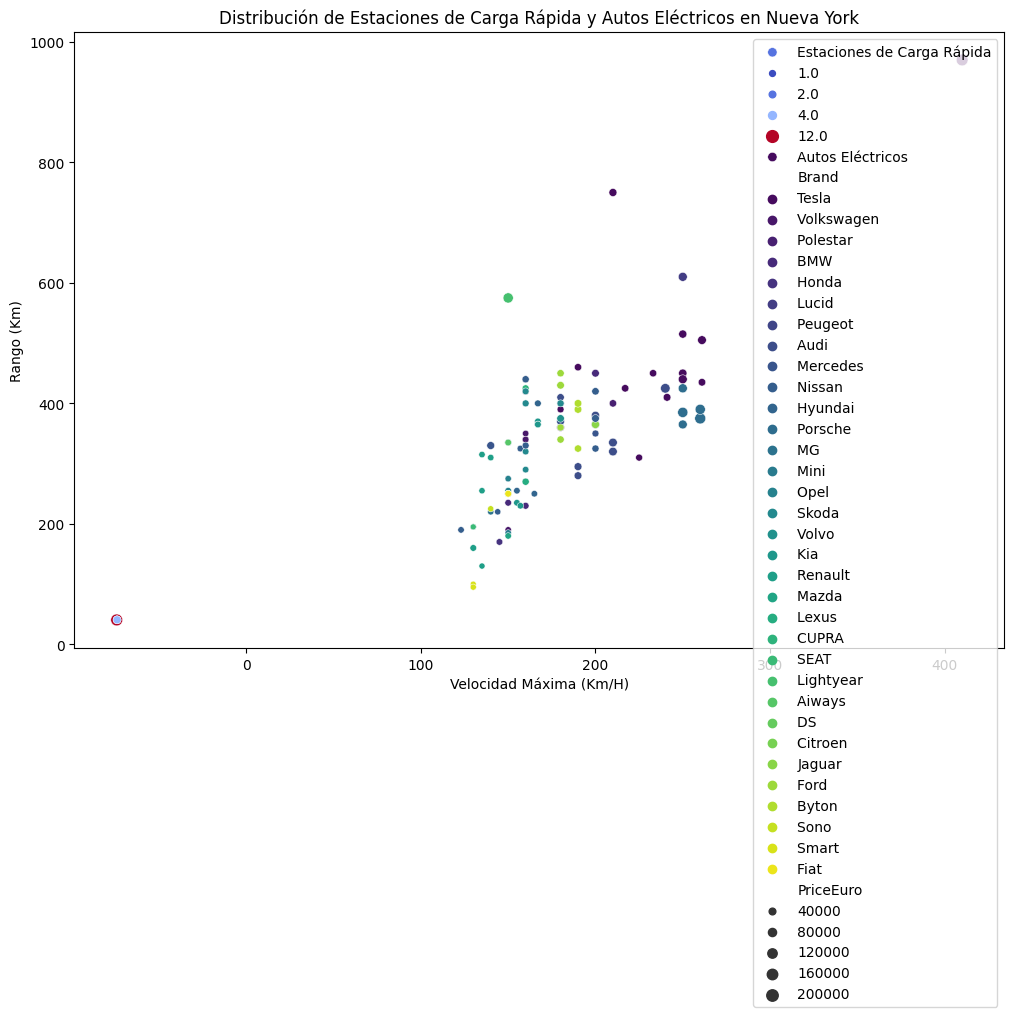

In [125]:
plt.figure(figsize=(12, 8))

# Estaciones de carga rápida
sns.scatterplot(x='Longitude', y='Latitude', data=nyc_stations, palette='coolwarm', hue='EV DC Fast Count', size='EV DC Fast Count', label='Estaciones de Carga Rápida')

# Autos eléctricos
sns.scatterplot(x='TopSpeed_KmH', y='Range_Km', data=elec_car_clean, hue='Brand', size='PriceEuro', palette='viridis', label='Autos Eléctricos')

plt.title('Distribución de Estaciones de Carga Rápida y Autos Eléctricos en Nueva York')
plt.xlabel('Velocidad Máxima (Km/H)')
plt.ylabel('Rango (Km)')
plt.legend()
plt.show()


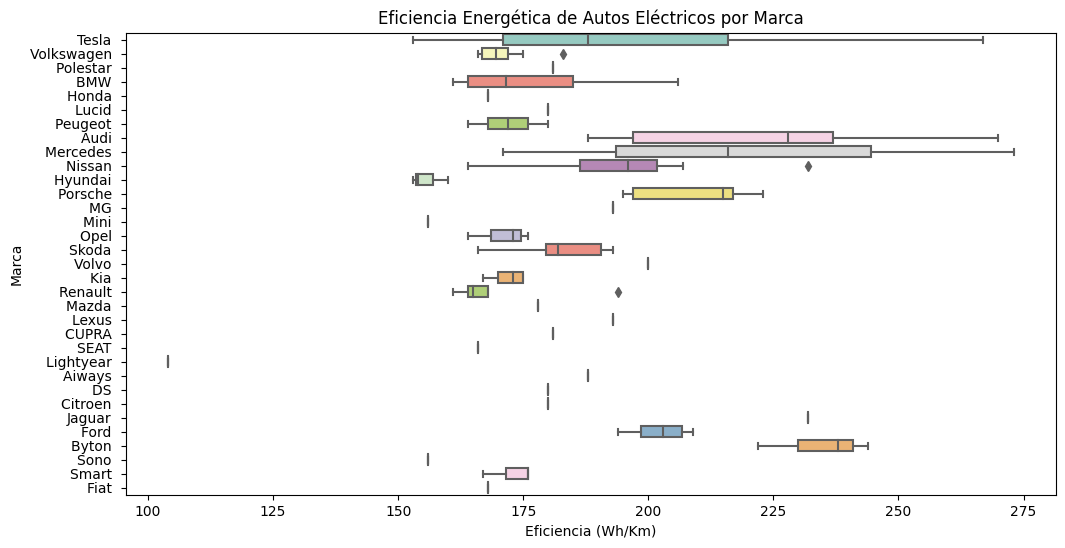

In [126]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Efficiency_WhKm', y='Brand', data=elec_car_clean, palette='Set3')
plt.title('Eficiencia Energética de Autos Eléctricos por Marca')
plt.xlabel('Eficiencia (Wh/Km)')
plt.ylabel('Marca')
plt.show()


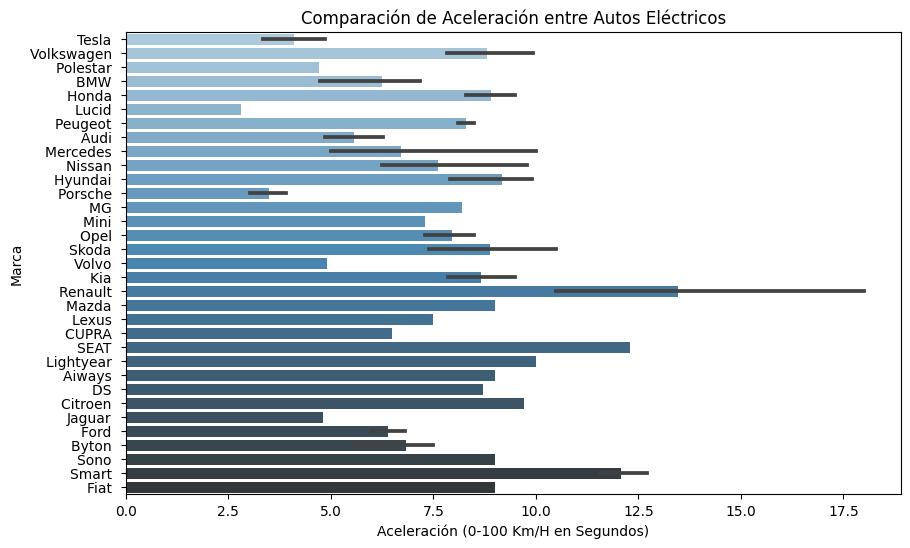

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AccelSec', y='Brand', data=elec_car_clean, palette='Blues_d')
plt.title('Comparación de Aceleración entre Autos Eléctricos')
plt.xlabel('Aceleración (0-100 Km/H en Segundos)')
plt.ylabel('Marca')
plt.show()



In [128]:
'''

import matplotlib.pyplot as plt
import seaborn as sns

# Porcentaje de vehículos con carga rápida más económicos (Barras)
plt.figure(figsize=(10, 6))
sns.barplot(x='RapidCharge', y='PriceEuro', data=elec_car_clean)
plt.title('Porcentaje de vehículos con carga rápida más económicos')
plt.xlabel('Tiene Carga Rápida')
plt.ylabel('Precio en Euros')
plt.show()

# Top 5 modelos con mayor eficiencia (Barras)
top_efficiency = elec_car_clean.nlargest(5, 'Efficiency_WhKm')
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Efficiency_WhKm', data=top_efficiency)
plt.title('Top 5 modelos con mayor eficiencia')
plt.xlabel('Modelo')
plt.ylabel('Eficiencia (Wh/Km)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Gráficos de líneas para las variables vs Precio
variables = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']
plt.figure(figsize=(14, 10))

for i, variable in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(x=elec_car_clean[variable], y=elec_car_clean['PriceEuro'])
    plt.title(f'{variable} vs Precio')
    plt.xlabel(variable)
    plt.ylabel('Precio en Euros')

plt.tight_layout()
plt.show()

# Top 5 modelos con mayor y top 5 modelos con menor para cada variable (Barras)
top_5_high_low = pd.concat([
    elec_car_clean.nlargest(5, 'AccelSec'),
    elec_car_clean.nsmallest(5, 'AccelSec'),
    elec_car_clean.nlargest(5, 'TopSpeed_KmH'),
    elec_car_clean.nsmallest(5, 'TopSpeed_KmH'),
    elec_car_clean.nlargest(5, 'Range_Km'),
    elec_car_clean.nsmallest(5, 'Range_Km'),
    elec_car_clean.nlargest(5, 'Efficiency_WhKm'),
    elec_car_clean.nsmallest(5, 'Efficiency_WhKm'),
    #elec_car_clean.nlargest(5, 'FastCharge_KmH'),
    #elec_car_clean.nsmallest(5, 'FastCharge_KmH'),
    elec_car_clean.nlargest(5, 'PriceEuro'),
    elec_car_clean.nsmallest(5, 'PriceEuro'),
], ignore_index=True)

plt.figure(figsize=(16, 30))
for i, variable in enumerate(variables + ['FastCharge_KmH', 'PriceEuro'], 1):
    plt.subplot(6, 2, i)
    sns.barplot(x='Model', y=variable, data=top_5_high_low, hue='Model', dodge=False)
    plt.title(f'Top 5 Modelos - {variable}')
    plt.xlabel('Modelo')
    plt.ylabel(variable)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
'''


"\n\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Porcentaje de vehículos con carga rápida más económicos (Barras)\nplt.figure(figsize=(10, 6))\nsns.barplot(x='RapidCharge', y='PriceEuro', data=elec_car_clean)\nplt.title('Porcentaje de vehículos con carga rápida más económicos')\nplt.xlabel('Tiene Carga Rápida')\nplt.ylabel('Precio en Euros')\nplt.show()\n\n# Top 5 modelos con mayor eficiencia (Barras)\ntop_efficiency = elec_car_clean.nlargest(5, 'Efficiency_WhKm')\nplt.figure(figsize=(12, 6))\nsns.barplot(x='Model', y='Efficiency_WhKm', data=top_efficiency)\nplt.title('Top 5 modelos con mayor eficiencia')\nplt.xlabel('Modelo')\nplt.ylabel('Eficiencia (Wh/Km)')\nplt.xticks(rotation=45, ha='right')\nplt.show()\n\n# Gráficos de líneas para las variables vs Precio\nvariables = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']\nplt.figure(figsize=(14, 10))\n\nfor i, variable in enumerate(variables, 1):\n    plt.subplot(2, 2, i)\n    sns.lineplot(x=elec_car_clean[va


AccelSec: Aceleración de 0 a 100 km/h en segundos.

TopSpeed_KmH: Velocidad máxima en kilómetros por hora.

Range_Km: Autonomía del vehículo en kilómetros con una carga completa.

Efficiency_WhKm: Eficiencia energética en vatios-hora por kilómetro.

FastCharge_KmH: Velocidad de carga rápida en kilómetros por hora.

RapidCharge: Indicador de si el vehículo admite carga rápida.

In [129]:
print("ElectricCarData Normalized:")
print()
print("Nulos por columna:", nulos_elec_car_norm)
print()
print("Duplicados:", duplicados_elec_car_norm)
print()
print("Outliers:", outliers_elec_car_norm)
print()

ElectricCarData Normalized:

Nulos por columna: Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

Duplicados: 0

Outliers: Seats        32
PriceEuro     6
dtype: int64



In [130]:
elec_car_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [131]:
elec_car_norm.head(10)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8 sec,250 km/h,610 km,180 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6 sec,150 km/h,190 km,168 Wh/km,220 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1 sec,150 km/h,275 km,164 Wh/km,420 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6 sec,225 km/h,310 km,153 Wh/km,650 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3 sec,180 km/h,400 km,193 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,D,5,55000


In [132]:
print("Light Duty Vehicles:")
print()
print("Nulos por columna:", nulos_light_duty)
print()
print("Duplicados:", duplicados_light_duty)
print()
print("Outliers:", outliers_light_duty)
print()

Light Duty Vehicles:

Nulos por columna: Vehicle ID                               0
Fuel ID                                  0
Fuel Configuration ID                   35
Manufacturer ID                          0
Category ID                              0
Model                                    0
Model Year                               0
Alternative Fuel Economy City         1413
Alternative Fuel Economy Highway      1503
Alternative Fuel Economy Combined     2541
Conventional Fuel Economy City         964
Conventional Fuel Economy Highway      962
Conventional Fuel Economy Combined    2245
Transmission Type                       84
Engine Type                            797
Engine Size                            134
Engine Cylinder Count                  565
Engine Description                    1037
Manufacturer                             0
Manufacturer URL                       164
Category                                 0
Fuel Code                                0
Fuel         

In [133]:
light_duty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

In [134]:
light_duty.head(10)

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Manufacturer,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,21.0,22.0,21.0,Auto,SI,3.5L,6.0,3.5L V6,Acura,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,29.0,38.0,32.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,28.0,36.0,31.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,24.0,30.0,26.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,26.0,34.0,29.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
5,12784,45,9.0,377,27,A4 S line quattro,2022,NaN,NaN,NaN,24.0,31.0,27.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
6,12786,45,9.0,377,27,A5 Cabriolet quattro,2022,NaN,NaN,NaN,23.0,31.0,26.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
7,12785,45,9.0,377,27,A5 Coupe quattro,2022,NaN,NaN,NaN,24.0,31.0,27.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
8,12787,45,9.0,377,27,A5 Sportback quattro,2022,NaN,NaN,NaN,26.0,34.0,29.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
9,12788,45,9.0,377,27,A5 Sportback S line quattro,2022,NaN,NaN,NaN,24.0,31.0,27.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [157]:
light_duty['Model Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991])

a tabla light_duty parece contener información sobre vehículos ligeros, con detalles sobre el tipo de combustible, la eficiencia del combustible, especificaciones del motor y otra información relacionada. Aquí hay una descripción de algunas de las columnas clave:

Vehicle ID: Identificación única del vehículo.

Fuel ID: Identificación del tipo de combustible.

Fuel Configuration ID: Identificación de la configuración del combustible.

Manufacturer ID: Identificación del fabricante del vehículo.

Category ID: Identificación de la categoría del vehículo.

Model: Modelo del vehículo.

Model Year: Año del modelo del vehículo.

Alternative Fuel Economy City/Highway/Combined: Eficiencia del combustible para combustibles alternativos en entornos urbanos, en carretera y combinado.

Conventional Fuel Economy City/Highway/Combined: Eficiencia del combustible para combustibles convencionales en entornos urbanos, en carretera y combinado.

Transmission Type: Tipo de transmisión del vehículo.

Engine Type: Tipo de motor del vehículo.

Engine Size: Tamaño del motor del vehículo.

Engine Cylinder Count: Número de cilindros del motor.

Engine Description: Descripción del motor.

Manufacturer: Fabricante del vehículo.

Manufacturer URL: URL del fabricante del vehículo.

Category: Categoría del vehículo.

Fuel Code/Fuel Configuration Name/Fuel: Código, nombre y tipo de combustible.

Electric-Only Range: Rango de conducción en modo eléctrico solamente.

PHEV Total Range/PHEV Type: Rango total y tipo de vehículo eléctrico híbrido enchufable.

Notes: Notas adicionales.

Drivetrain: Tipo de tren motriz del vehículo

In [135]:
print("Vehicle Fuel Types:")
print()
print("Nulos por columna:", nulos_vihicle_fuel)
print()
print("Duplicados:", duplicados_vihicle_fuel)
print()
print("Outliers:", outliers_vihicle_fuel)
print()

Vehicle Fuel Types:

Nulos por columna: Vehicle ID                               0
Fuel ID                                  0
Fuel Configuration ID                   35
Manufacturer ID                          0
Category ID                              0
Model                                    0
Model Year                               0
Alternative Fuel Economy City         1413
Alternative Fuel Economy Highway      1503
Alternative Fuel Economy Combined     2541
Conventional Fuel Economy City         964
Conventional Fuel Economy Highway      962
Conventional Fuel Economy Combined    2245
Transmission Type                       84
Engine Type                            797
Engine Size                            134
Engine Cylinder Count                  565
Engine Description                    1037
Manufacturer                             0
Manufacturer URL                       164
Category                                 0
Fuel Code                                0
Fuel          

In [136]:
vihicle_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

In [137]:
vihicle_fuel.head(10)

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Manufacturer,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,21.0,22.0,21.0,Auto,SI,3.5L,6.0,3.5L V6,Acura,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,29.0,38.0,32.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,28.0,36.0,31.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,24.0,30.0,26.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,26.0,34.0,29.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
5,12784,45,9.0,377,27,A4 S line quattro,2022,NaN,NaN,NaN,24.0,31.0,27.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
6,12786,45,9.0,377,27,A5 Cabriolet quattro,2022,NaN,NaN,NaN,23.0,31.0,26.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
7,12785,45,9.0,377,27,A5 Coupe quattro,2022,NaN,NaN,NaN,24.0,31.0,27.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
8,12787,45,9.0,377,27,A5 Sportback quattro,2022,NaN,NaN,NaN,26.0,34.0,29.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
9,12788,45,9.0,377,27,A5 Sportback S line quattro,2022,NaN,NaN,NaN,24.0,31.0,27.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [158]:
vihicle_fuel['Model Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991])

Vehicle ID: Identificación única del vehículo.

Fuel ID: Identificación del tipo de combustible.

Fuel Configuration ID: Identificación de la configuración del combustible.

Manufacturer ID: Identificación del fabricante del vehículo.

Category ID: Identificación de la categoría del vehículo.

Model: Modelo del vehículo.

Model Year: Año del modelo del vehículo.

Alternative Fuel Economy City/Highway/Combined:
Economía de combustible del vehículo en condiciones de conducción en ciudad, carretera y combinada cuando utiliza combustible alternativo.

Conventional Fuel Economy City/Highway/Combined:
Economía de combustible del vehículo en condiciones de conducción en ciudad, carretera y combinada cuando utiliza combustible convencional.

Transmission Type: Tipo de transmisión del vehículo.

Engine Type: Tipo de motor del vehículo.

Engine Size: Tamaño del motor del vehículo.

Engine Cylinder Count: Número de cilindros del motor.

Engine Description: Descripción del motor del vehículo.

Manufacturer: Fabricante del vehículo.

Manufacturer URL: URL del fabricante.

Category: Categoría del vehículo.

Fuel Code: Código de combustible.

Fuel: Tipo de combustible.

Fuel Configuration Name: Nombre de la configuración del combustible.

Electric-Only Range: Rango de operación solo eléctrico para vehículos híbridos enchufables (PHEV).

PHEV Total Range: Rango total para vehículos híbridos enchufables.

PHEV Type: Tipo de vehículo híbrido enchufable.

Notes: Notas adicionales.

Drivetrain: Tipo de tren motriz del vehículo.

In [138]:
print("Taxi Zone Lookup:")
print()
print("Nulos por columna:", nulos_taxi_zones_lookup)
print()
print("Duplicados:", duplicados_taxi_zones_lookup)
print()
print("Outliers:", outliers_taxi_zones_lookup)
print()

Taxi Zone Lookup:

Nulos por columna: LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

Duplicados: 0

Outliers: LocationID    0
dtype: int64



In [139]:
taxi_zones_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [140]:
taxi_zones_lookup.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


descripción de las columnas en la tabla taxi_zones_lookup:

LocationID: Identificación única de la ubicación o zona.

Borough: Distrito o municipio al que pertenece la zona.

Zone: Nombre de la zona.

service_zone: Zona de servicio.

Es una tabla que parece contener información sobre las zonas de taxi en una ciudad, con detalles sobre la ubicación, el municipio y el tipo de zona de servicio. Si tienes alguna pregunta específica sobre esta tabla o si necesitas realizar algún tipo de análisis, no dudes en preguntar.

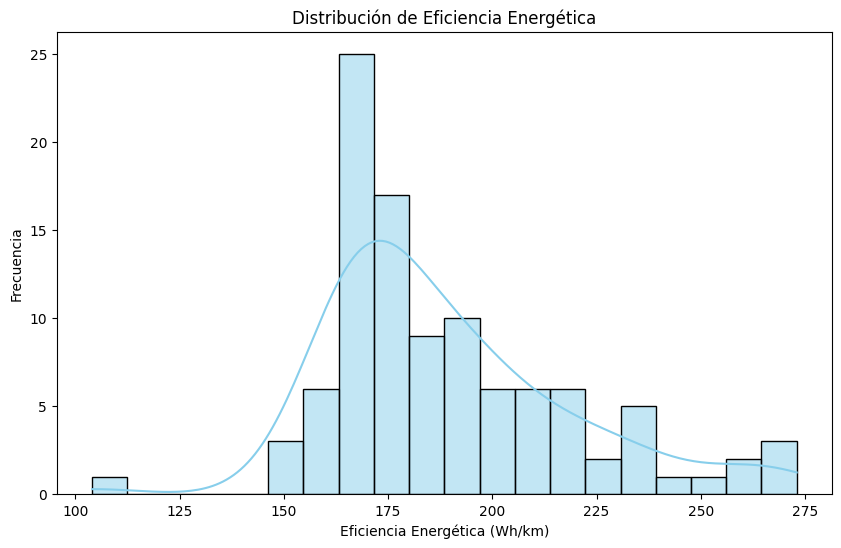

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la eficiencia energética
plt.figure(figsize=(10, 6))
sns.histplot(elec_car_clean['Efficiency_WhKm'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Eficiencia Energética')
plt.xlabel('Eficiencia Energética (Wh/km)')
plt.ylabel('Frecuencia')
plt.show()


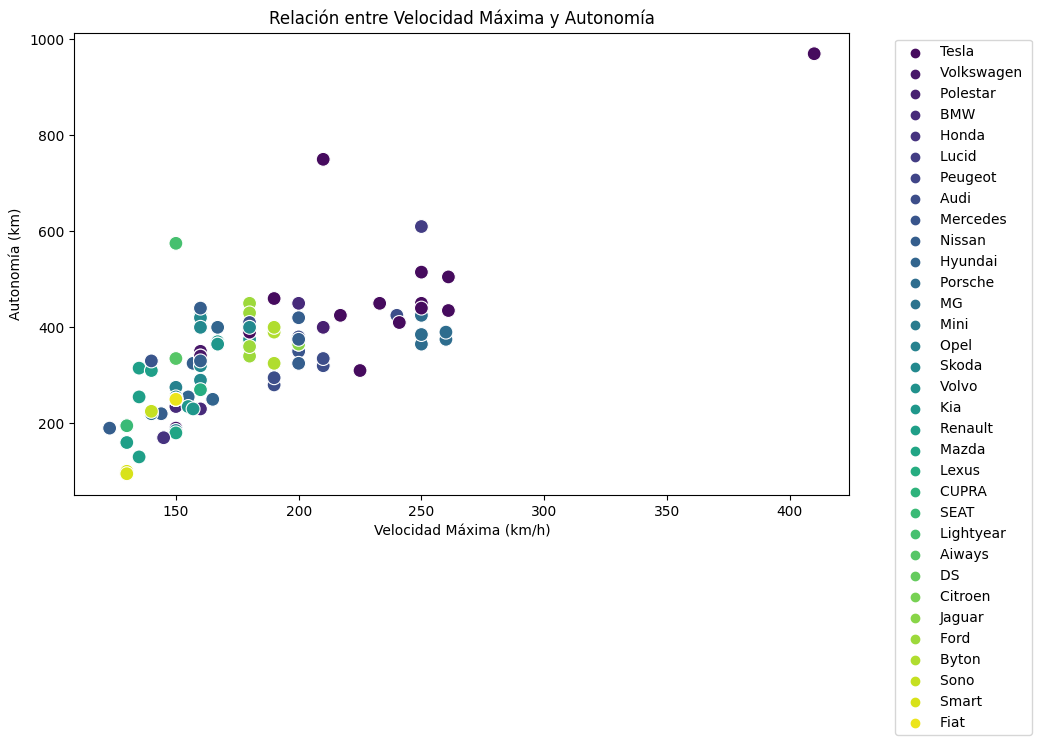

In [142]:
# Diagrama de dispersión de velocidad máxima vs autonomía
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TopSpeed_KmH', y='Range_Km', data=elec_car_clean, hue='Brand', palette='viridis', s=100)
plt.title('Relación entre Velocidad Máxima y Autonomía')
plt.xlabel('Velocidad Máxima (km/h)')
plt.ylabel('Autonomía (km)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


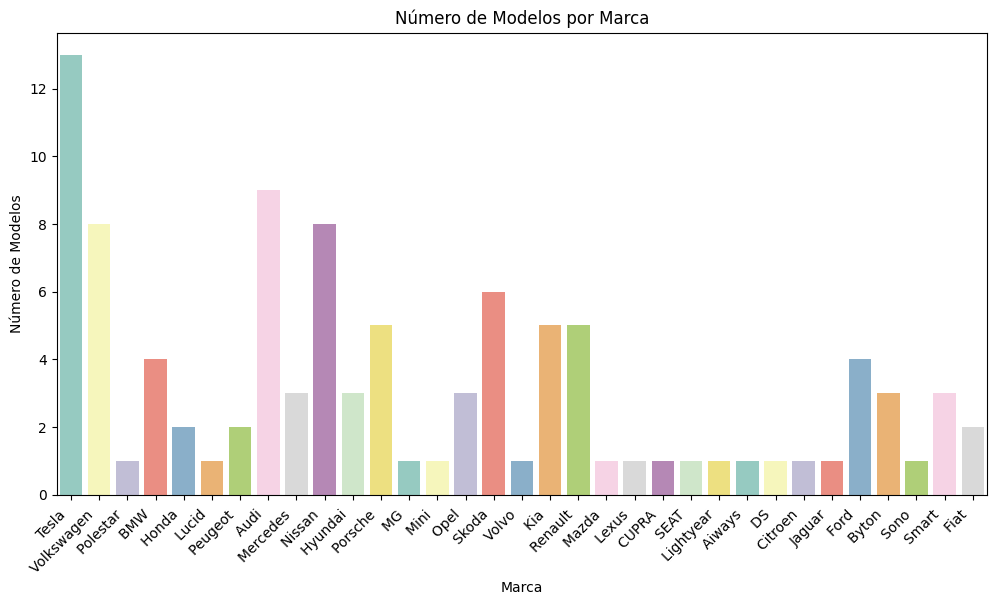

In [143]:
# Gráfico de barras de número de modelos por marca
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', data=elec_car_clean, palette='Set3')
plt.title('Número de Modelos por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de Modelos')
plt.xticks(rotation=45, ha='right')
plt.show()


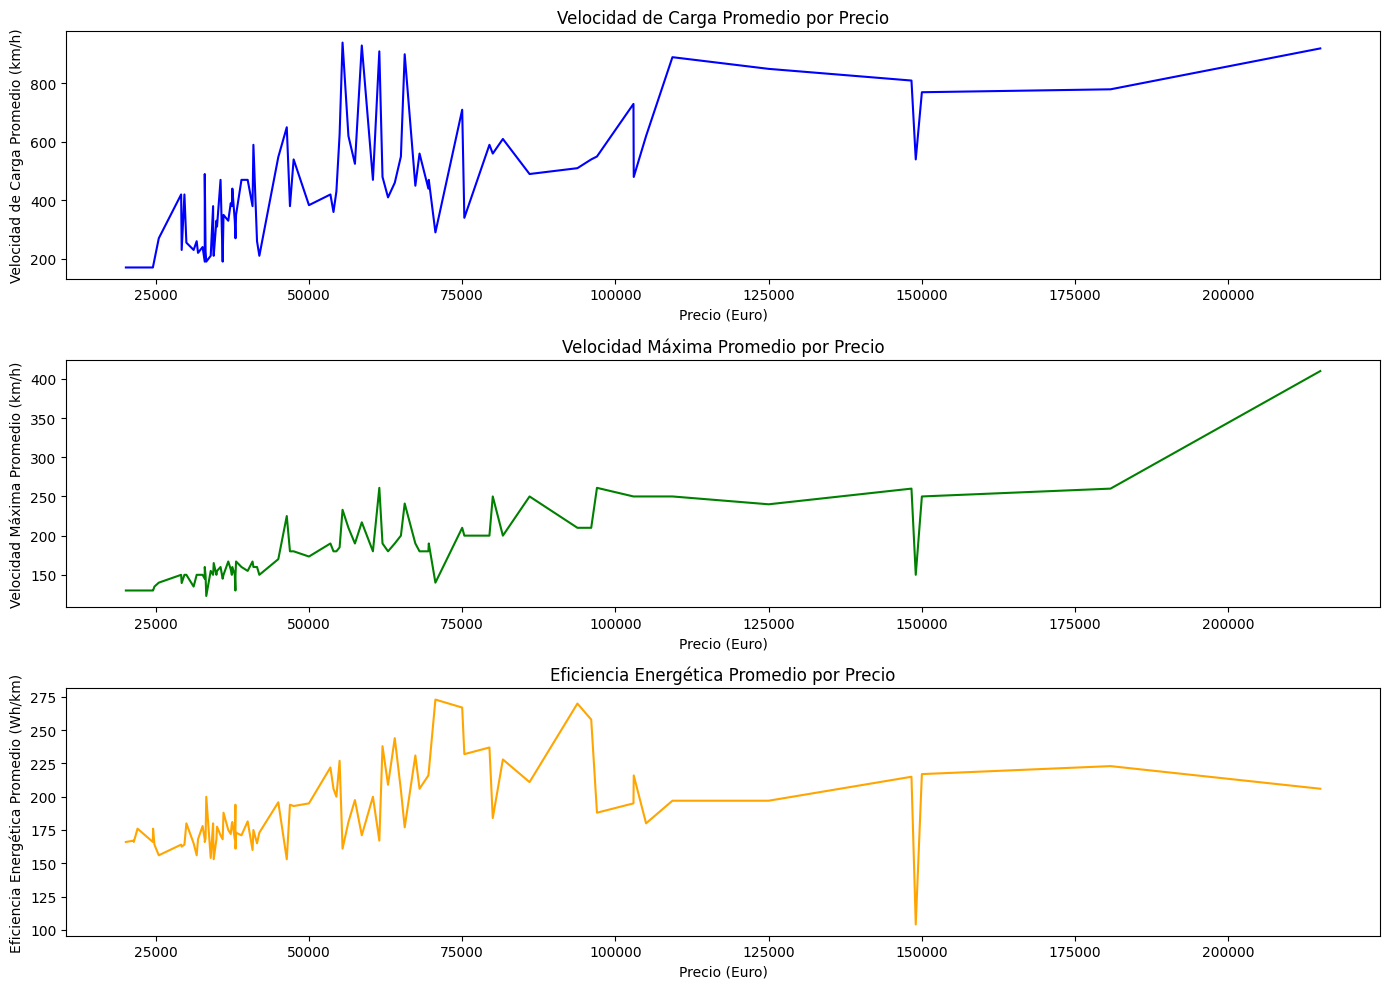

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la velocidad de carga a tipo numérico
elec_car_clean['FastCharge_KmH'] = pd.to_numeric(elec_car_clean['FastCharge_KmH'], errors='coerce')

# Calcular el promedio por precio
precio_promedio = elec_car_clean.groupby('PriceEuro').agg({
    'Range_Km': 'mean',
    'TopSpeed_KmH': 'mean',
    'FastCharge_KmH': 'mean',
    'Efficiency_WhKm': 'mean'
}).reset_index()

# Gráficos de líneas
plt.figure(figsize=(14, 10))

# Velocidad de carga promedio por precio
plt.subplot(3, 1, 1)
sns.lineplot(x='PriceEuro', y='FastCharge_KmH', data=precio_promedio, color='blue')
plt.title('Velocidad de Carga Promedio por Precio')
plt.xlabel('Precio (Euro)')
plt.ylabel('Velocidad de Carga Promedio (km/h)')

# Velocidad máxima promedio por precio
plt.subplot(3, 1, 2)
sns.lineplot(x='PriceEuro', y='TopSpeed_KmH', data=precio_promedio, color='green')
plt.title('Velocidad Máxima Promedio por Precio')
plt.xlabel('Precio (Euro)')
plt.ylabel('Velocidad Máxima Promedio (km/h)')

# Eficiencia energética promedio por precio
plt.subplot(3, 1, 3)
sns.lineplot(x='PriceEuro', y='Efficiency_WhKm', data=precio_promedio, color='orange')
plt.title('Eficiencia Energética Promedio por Precio')
plt.xlabel('Precio (Euro)')
plt.ylabel('Eficiencia Energética Promedio (Wh/km)')

plt.tight_layout()
plt.show()


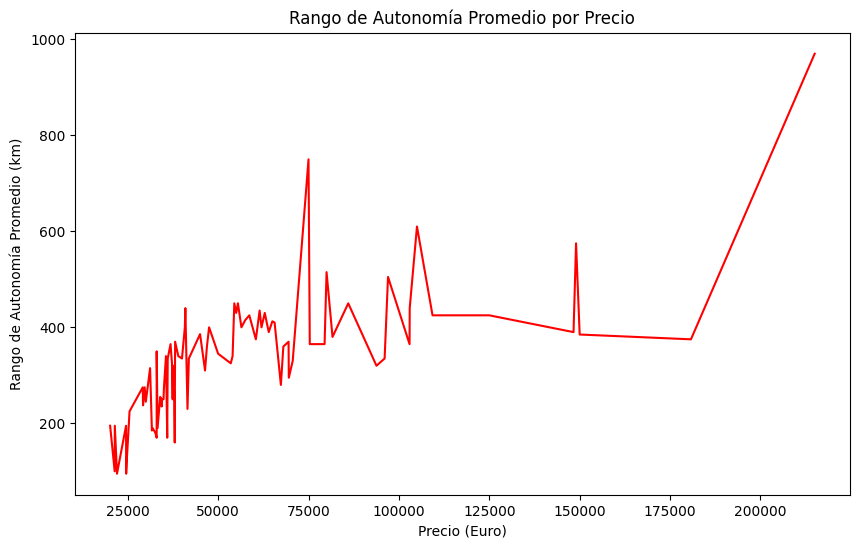

In [145]:
# Gráfico de línea para el rango de autonomía promedio por precio
plt.figure(figsize=(10, 6))
sns.lineplot(x='PriceEuro', y='Range_Km', data=precio_promedio, color='red')
plt.title('Rango de Autonomía Promedio por Precio')
plt.xlabel('Precio (Euro)')
plt.ylabel('Rango de Autonomía Promedio (km)')
plt.show()


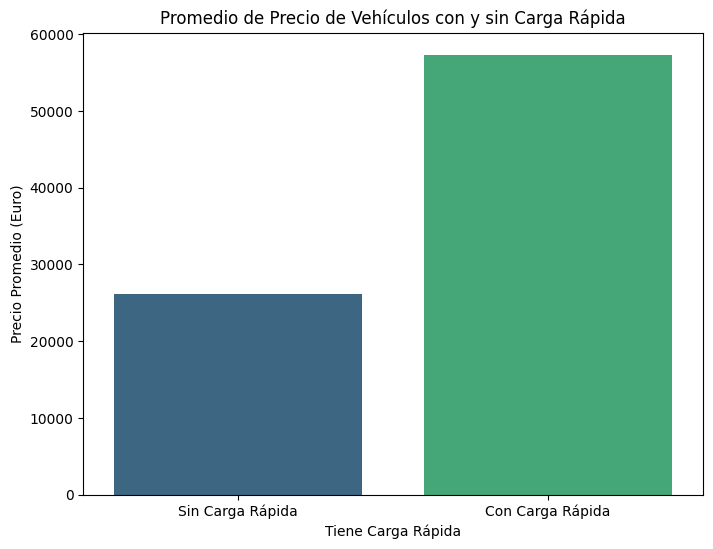

In [146]:
# Crear una nueva columna que indique si el vehículo tiene carga rápida
elec_car_clean['TieneCargaRapida'] = elec_car_clean['FastCharge_KmH'].notnull()

# Calcular el promedio de precio por la presencia o ausencia de carga rápida
precio_promedio_carga_rapida = elec_car_clean.groupby('TieneCargaRapida')['PriceEuro'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='TieneCargaRapida', y='PriceEuro', data=precio_promedio_carga_rapida, palette='viridis')
plt.title('Promedio de Precio de Vehículos con y sin Carga Rápida')
plt.xlabel('Tiene Carga Rápida')
plt.ylabel('Precio Promedio (Euro)')
plt.xticks([0, 1], ['Sin Carga Rápida', 'Con Carga Rápida'])

plt.show()


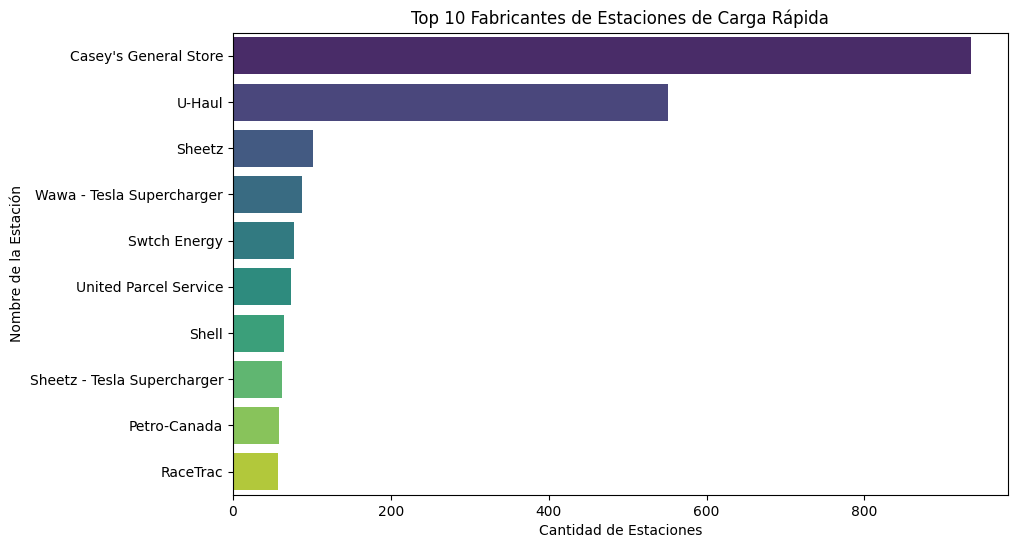

In [147]:
# Gráfico de barras horizontales para mostrar los top fabricantes de vehículos con carga rápida
top_fabricantes = elec_alt_fuel['Station Name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fabricantes.values, y=top_fabricantes.index, palette='viridis')
plt.title('Top 10 Fabricantes de Estaciones de Carga Rápida')
plt.xlabel('Cantidad de Estaciones')
plt.ylabel('Nombre de la Estación')
plt.show()



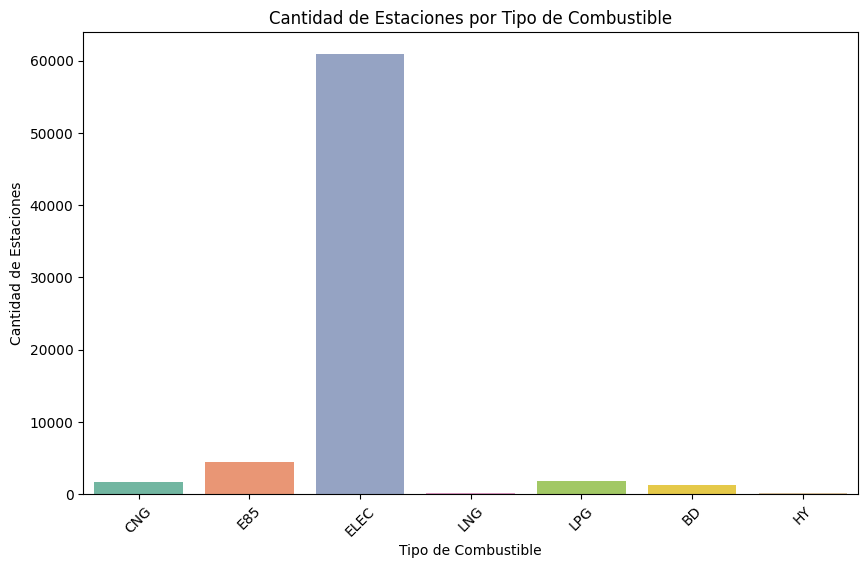

In [148]:
# Gráfico de barras para mostrar la cantidad de estaciones por tipo de combustible
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type Code', data=elec_alt_fuel, palette='Set2')
plt.title('Cantidad de Estaciones por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad de Estaciones')
plt.xticks(rotation=45)
plt.show()


alt_fuel_ruta = ruta + 'Alternative Fuel Vehicles US.csv'
alt_fuel = pd.read_csv(alt_fuel_ruta)

elec_alt_fuel_ruta = ruta + 'Electric and Alternative Fuel Charging Stations.csv'
elec_alt_fuel = pd.read_csv(elec_alt_fuel_ruta)

elec_car_ruta = ruta + 'ElectricCarData_Clean.csv'
elec_car_clean = pd.read_csv(elec_car_ruta)

elec_car_ruta_norm = ruta + 'ElectricCarData_Norm.csv'
elec_car_norm = pd.read_csv(elec_car_ruta_norm)

light_duty_ruta = ruta + 'Light Duty Vehicles.csv'
light_duty = pd.read_csv(light_duty_ruta)

vihicle_fuel_ruta = ruta + 'Light Duty Vehicles.csv'
vihicle_fuel = pd.read_csv(vihicle_fuel_ruta)

taxi_zones_ruta = ruta + 'taxi+_zone_lookup.csv'
taxi_zones_lookup = pd.read_csv(taxi_zones_ruta)

In [149]:
alt_fuel.columns

Index(['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Transmission Make', 'Engine Type', 'Engine Size',
       'Engine Cylinder Count', 'Number of Passengers',
       'Heavy-Duty Power System', 'Notes', 'Drivetrain'],
      dtype='object')

In [150]:
len(alt_fuel)

882

In [151]:
alt_fuel.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [152]:
alt_fuel.tail()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
877,Street Sweeper,HSP,NaN,TYMCO,CNG - Compressed Natural Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cummins Westport L9N 8.9L Near Zero,NaN,NaN
878,Step Van,(various models),NaN,Utilimaster,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,According to manufacturer: Various platforms a...,NaN
879,Transit Bus,CX45E,NaN,Van Hool,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 56,Siemens ELFA2 Electric Drive System 360kW,According to manufacturer: 676 kWh battery sto...,NaN
880,Tractor,VNR Electric - Class 8,NaN,Volvo,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"According to manufacturer: 340kW; 455hp; 4,051...",NaN
881,Step Van,C-Series,NaN,Workhorse,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,Workhorse Dual Axial Flux Interior Permanent M...,According to manufacturer: Up to 105 kWh batte...,NaN


In [153]:
elec_alt_fuel.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N